In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../input/extracted-midi-features/extracted_midi_features.csv', sep=',', header=None)

df = df.drop(22)

name_labels = df.iloc[:,0]
features = df.iloc[:,1:]

pca = PCA(3)
df_pca = pca.fit_transform(features)

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

silhouette_scores = []
K = range(1, 13)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_pca)
    
    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_pca.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    if (k is not 1):
        kmeans_silhouette_score = silhouette_score(df_pca, kmeanModel.labels_)
        silhouette_scores.append(kmeans_silhouette_score)

    mapping1[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca.shape[0]
    
    mapping2[k] = kmeanModel.inertia_

1 : 13.79806842786937
2 : 9.176851776317879
3 : 7.407230552261391
4 : 6.924971977404859
5 : 6.442199493654182
6 : 5.932004852142619
7 : 5.549730715750382
8 : 5.144473177251201
9 : 4.896147623578695
10 : 4.733391536510759
11 : 4.543914013325326
12 : 4.436151627898595


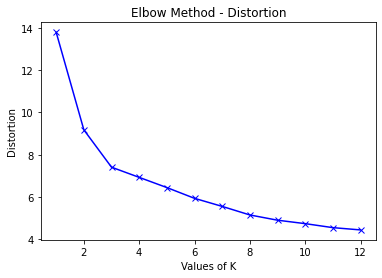

1 : 56013.34230679331
2 : 23793.465032235985
3 : 16045.542859325325
4 : 13590.052041683537
5 : 11257.379994215036
6 : 9540.468599609094
7 : 8087.383547788888
8 : 7227.350506782831
9 : 6559.66746046686
10 : 6023.898585528818
11 : 5478.744427225462
12 : 5235.641979617162


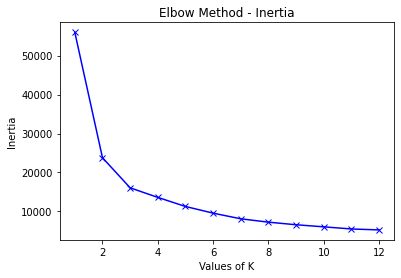

[0.4860113620773466, 0.39075733856591244, 0.4094436391319782, 0.3553210387193514, 0.32497687255044977, 0.33653343458424756, 0.31294076662346587, 0.30571948955139944, 0.3151440209695333, 0.30468373567820795, 0.28738041780437124]


In [4]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method - Distortion')
plt.show()

for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

print(silhouette_scores)

In [5]:
kmeans = KMeans(n_clusters=4,random_state=42)

label = kmeans.fit_predict(df_pca)

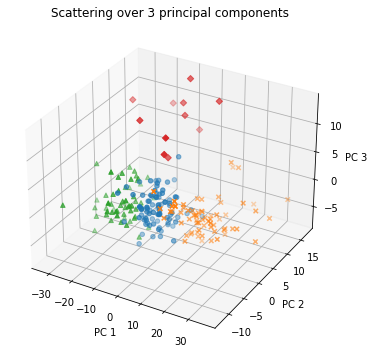

In [6]:
u_labels = np.unique(label)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

markers=['o', 'x', '^', 'D']

for i in u_labels:
    ax.scatter(df_pca[label == i, 0], df_pca[label == i, 1], df_pca[label == i, 2], label = i, marker=markers[i])

# ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2])
ax.set_title('Scattering over 3 principal components')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

In [7]:
kmeans_silhouette_score = silhouette_score(df_pca, kmeans.labels_).round(2)
print(kmeans_silhouette_score)

0.41
